# TP noté -- Statistical models for decision making - partie 2

Cet devoir noté est composé de deux exercices. Il sera idéalement réalisé en binome et éventuellement seul. Les réponses seront données dans un notebook qui indiquera clairement les **noms et prénoms des élèves** l'ayant realisé.


### Audrey Maurette
### Alexandre TONON

## Exercice 1

Nous souhaitons évaluer si un nouveau produit a un effet significatif sur le rendement de moteurs. Pour y répondre, ce rendement (*Efficiency*) a été mesuré sur deux types de moteurs (*Brand_1* et *Brand_2*) et en testant différents niveaux de concentration (*Concentration*) du produit. Les observations sont dans le fichier *E2_Efficiency_Obs.csv*. Plus spécifiquement, nous nous demandons :
- Le produit semble-t-il avoir un effet ?
- Cet effet est-il différent en fonction de la marque du moteur ?
- Cet effet dépend-il de la concentration du produit ?

### Question 1.1 

Ouvrez et observez les données. A leur vue, quelle vous semble être la réponse aux trois questions posées plus haut ?

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


dataframe=pd.read_csv("./E1_Efficiency_Obs.csv",sep=',')

In [31]:
dataframe.head()

df_brand1 = dataframe[dataframe["Brand"] == "Brand_1"]
df_brand2 = dataframe[dataframe["Brand"] == "Brand_2"]

df_brand1.describe()

,Concentration,Efficiency
count,50.000000,50.000000
mean,5.285968,3.749378
std,2.745240,1.397119
min,0.402640,1.099200
25%,3.458750,2.766100
50%,5.531650,3.790600
75%,7.627775,4.748475
max,9.858800,5.926600


In [32]:
df_brand2.describe()

,Concentration,Efficiency
count,20.000000,20.000000
mean,4.617638,4.216485
std,3.077085,1.066503
min,0.800660,2.177800
25%,2.075400,3.645375
50%,3.753500,4.030550
75%,6.873100,4.717200
max,9.974900,6.731900


<span style="color: skyblue; font-weight: bold;"> Réponse 1.1</span>

<span style="color:skyblue">


**1) Le produit semble-t-il avoir de l'effet ?**   

En supposant que le rendement initial (sans produit) soit de 1, il semble que le produit ait de l'effet car pour les deux marques, l'ensemble des valeurs de Efficiency sont supérieures à 1.

**2) Cet effet est-il différent en fonction de la marque du moteur ?**

L'effet semble dépendre de la concentration pour chaque marque, il est donc difficile de répondre à cette question sans poursuivre l'étude car rien n'indique que les conditions de test sont identiques pour les deux marques :  
    - L'intervalle des valeurs testées n'est pas le même ($[0.40, 9.86]$ pour la marque 1 et $[0.80, 9.97]$)  
    - Le nombre de valeurs testées est différent (50 pour la marque 1 et 20 pour la marque 2)  

Ainsi sans étude sur la relation entre concentration et efficacité on ne peut pas conclure  

**3) Cet effet dépend-il de la concentration du produit ?**

Comme mentionné dans la 2) la concentration semble avoir un effet sur l'efficacité.

</span>

### Question 1.2



Afin de répondre aux questions, deux hypothèses sont formulées :
- Pour chaque marque de moteur, la relation entre la concentration et le rendement est supposée linéaire.
- La distribution du bruit des observations est supposé suivre une loi Normale centrée.

Quelle démarche de modélisation statistique allez-vous utiliser pour répondre aux trois questions posées en introduction ? Une fois la démarche bien expliquée, testez la sur les données observées afin de conclure sur l'efficacité du produit.




<span style="color: skyblue; font-weight: bold;"> Réponse 1.2</span>

<span style='color:skyblue'>

**Démarche :**

1) Pour s'assurer de l'effet du produit on estime le coefficient de la relation affine **pour chaque marque** tel que              $Efficiency = B0 + B1 * Concentration$ :
- Si $B0 > 1$ et $B1=0$ alors le produit a un effet positif sur l'efficacité mais celui ci ne dépend pas de la concentration
- Si $B0 = 1$ et $B1=0$ alors l'efficacité est inchangée et le produit n'a pas d'impact
- Si $B1 > 0$ alors le produit a un effet positif sur l'efficacité et il dépend de la concentration. Et inversement si il est négatif  
Toutes ces interprétations ne sont valides que si le R² est jugé suffisamment élevé (par exemple ≥ 0.8), ce qui traduit une bonne qualité d’ajustement du modèle et une confiance relative dans la régression.

2) Pour comparer l'effet par marque :
- Dans un premier temps, on affiche nos régressions issues de l'estimation de nos paramètres réalisées en 1) et on regarde les tendances
- Dans un second temps, comme nous avons peu de données, il se peut que l'on surestime l'effet de la marque sur l'évolution de l'efficacité en fonction de la concentration. Pour se forger une opinion plus robuste, on réalise un test statistiques : 
*H0 = les droites sont de pentes identiques pour les deux marques"*.
Grace aux hypothèses relation linéaire et distribution du bruit qui suit une loi Normale centrée, on peut réaliser un test de Fischer.

</span>

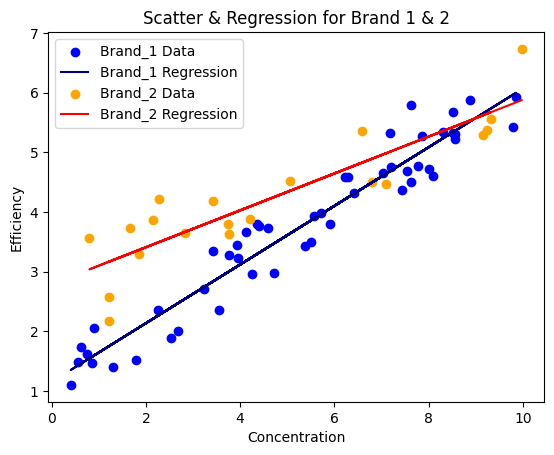

Pour la marque 1, B0 (intercept) = 1.1514, B1 (slope) = 0.4915
R² pour la marque 1 : 0.9326
Pour la marque 2, B0 (intercept) = 2.7896, B1 (slope) = 0.3090
R² pour la marque 2 : 0.7949


In [33]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

X1 = df_brand1["Concentration"].values.reshape(-1, 1)
y1 = df_brand1["Efficiency"].values

X2 = df_brand2["Concentration"].values.reshape(-1, 1)
y2 = df_brand2["Efficiency"].values

lr_brand1 = LinearRegression()
lr_brand2 = LinearRegression()

lr_brand1.fit(X1, y1)
lr_brand2.fit(X2, y2)

y1_pred = lr_brand1.predict(X1)
y2_pred = lr_brand2.predict(X2)

plt.scatter(df_brand1['Concentration'], df_brand1['Efficiency'], color='blue', label='Brand_1 Data')
plt.plot(df_brand1['Concentration'], y1_pred, color='navy', label='Brand_1 Regression')

plt.scatter(df_brand2['Concentration'], df_brand2['Efficiency'], color='orange', label='Brand_2 Data')
plt.plot(df_brand2['Concentration'], y2_pred, color='red', label='Brand_2 Regression')

plt.xlabel('Concentration')
plt.ylabel('Efficiency')
plt.title('Scatter & Regression for Brand 1 & 2')
plt.legend()
plt.show()

print(f"Pour la marque 1, B0 (intercept) = {lr_brand1.intercept_:.4f}, B1 (slope) = {lr_brand1.coef_[0]:.4f}")
print(f"R² pour la marque 1 : {r2_score(y1, y1_pred):.4f}")

print(f"Pour la marque 2, B0 (intercept) = {lr_brand2.intercept_:.4f}, B1 (slope) = {lr_brand2.coef_[0]:.4f}")
print(f"R² pour la marque 2 : {r2_score(y2, y2_pred):.4f}")


<span style='color:skyblue'>

Les deux valeurs de B1 sont non nulles et les R² suffisant donc le produit a bien un effet sur l'efficacité.

On constate qu'il y a  visuellement deux tendances différentes sur l'intervalle de concentration considéré. Pour autant cet écart est marqué dans les faibles concentration, qui sont possiblement moins fiables du point de vue de l'expérience (on peut imaginer que avec moins de produit l'effet est plus difficile à mesurer par exemple). De plus on a peu de données : un test statistique s'impose donc pour valider cette hypothèse. On va réaliser un test de Fischer pour tester H0 : "les droites ont la même pente".

La statistique du test provient du chapitre 4.3 du cours : On va tester l'égalité des variances des résidus du modèle complet (avec b1 et b0 différent pour chaque marques) et du modèle réduit, dans lequel les b0 sont différents pour chacune des marques, mais avec un b1 commun.

</span>

In [ ]:
from scipy.stats import f


## Modèle complet (pentes différentes)

y_pred1 = lr_brand1.predict(X1)
y_pred2 = lr_brand2.predict(X2)

RSS_full = np.sum((y1 - y_pred1) ** 2) + np.sum((y2 - y_pred2) ** 2)


## Modèle réduit (pente commune, intercepts différents)

df = pd.concat([df_brand1.assign(Marque=0), df_brand2.assign(Marque=1)], axis=0)

X_reduced = np.column_stack([df["Concentration"], df["Marque"]])  # On crée une variable indicatrice pour la marque, pour pouvoir différencier les intercepts
y = df["Efficiency"].values

model_reduced = LinearRegression().fit(X_reduced, y)
y_pred_reduced = model_reduced.predict(X_reduced)

RSS_reduced = np.sum((y - y_pred_reduced) ** 2)


## Test de Fisher

n = len(df)

# nombre de paramètres estimés
p_reduced = X_reduced.shape[1] + 1  
p_full = 4                         


df_reduced = n - p_reduced
df_full = n - p_full

df_num = df_reduced - df_full 
df_den = df_full

F_stat = ((RSS_reduced - RSS_full) / df_num) / (RSS_full / df_den)
p_value = 1 - f.cdf(F_stat, df_num, df_den)


print("Résultats du test de Fisher :")
print(f"RSS réduit   = {RSS_reduced:.3f}")
print(f"RSS complet  = {RSS_full:.3f}")
print(f"F = {F_stat:.3f}")
print(f"p-value = {p_value:.6f}")

if p_value < 0.05:
    print("Les pentes diffèrent significativement entre les deux marques (on rejette H0).")
else:
    print("On ne rejette pas H0 : pente commune suffisante (droites parallèles).")


Résultats du test de Fisher :
RSS réduit   = 14.903
RSS complet  = 10.876
F = 24.441
p-value = 0.000006
Les pentes diffèrent significativement entre les deux marques (on rejette H0).


<span style="color: skyblue; font-weight: bold;"> Conclusion exercice 1</span>

<span style="color:skyblue">

Réponse aux 3 questions :

**1) Le produit semble-t-il avoir de l'effet ?**   

..

**2) Cet effet est-il différent en fonction de la marque du moteur ?**

..

**3) Cet effet dépend-il de la concentration du produit ?**

..

</span>

## Exercice 2


Afin d'estimer efficacement le niveau de fatigue des ailes d'un d'avion au cours des années, il a été proposé de lancer une étude pour évaluer s'il était possible de déduire le niveau de stress subit par les ailes de l'avion lors de phases de vols diverses avec de données capteurs acquises en routine pendant les vols. Une personne ayant une expertise mécanique sur le modèle d'avion étudié a alors quantifié le niveau de stress subi par les ailes dans différentes phases de vols et différents contextes. Nous allons mettre en lien ces niveaux de stress avec des données capteurs acquises au même moment que les annotations. Nous allons pour cela utiliser la régression linaire. 


### QUESTION 2.1

Les données d'apprentissage sont dans les fichiers *E2_sensor_vals.csv* et *E2_stress_vals.csv*. Ouvrez ces fichiers et mettez les données dans des numpy arrays ou des pandas dataframes *X* et *Y*. Représentez alors le lien entre les valeurs issues de chaque capteur et le niveau de stress dans des nuages de points 2D. Identifiez-vous des relations entre des données capteur et le niveau de stress ? Quels capteurs vous paraissent être les plus pertinents.
 

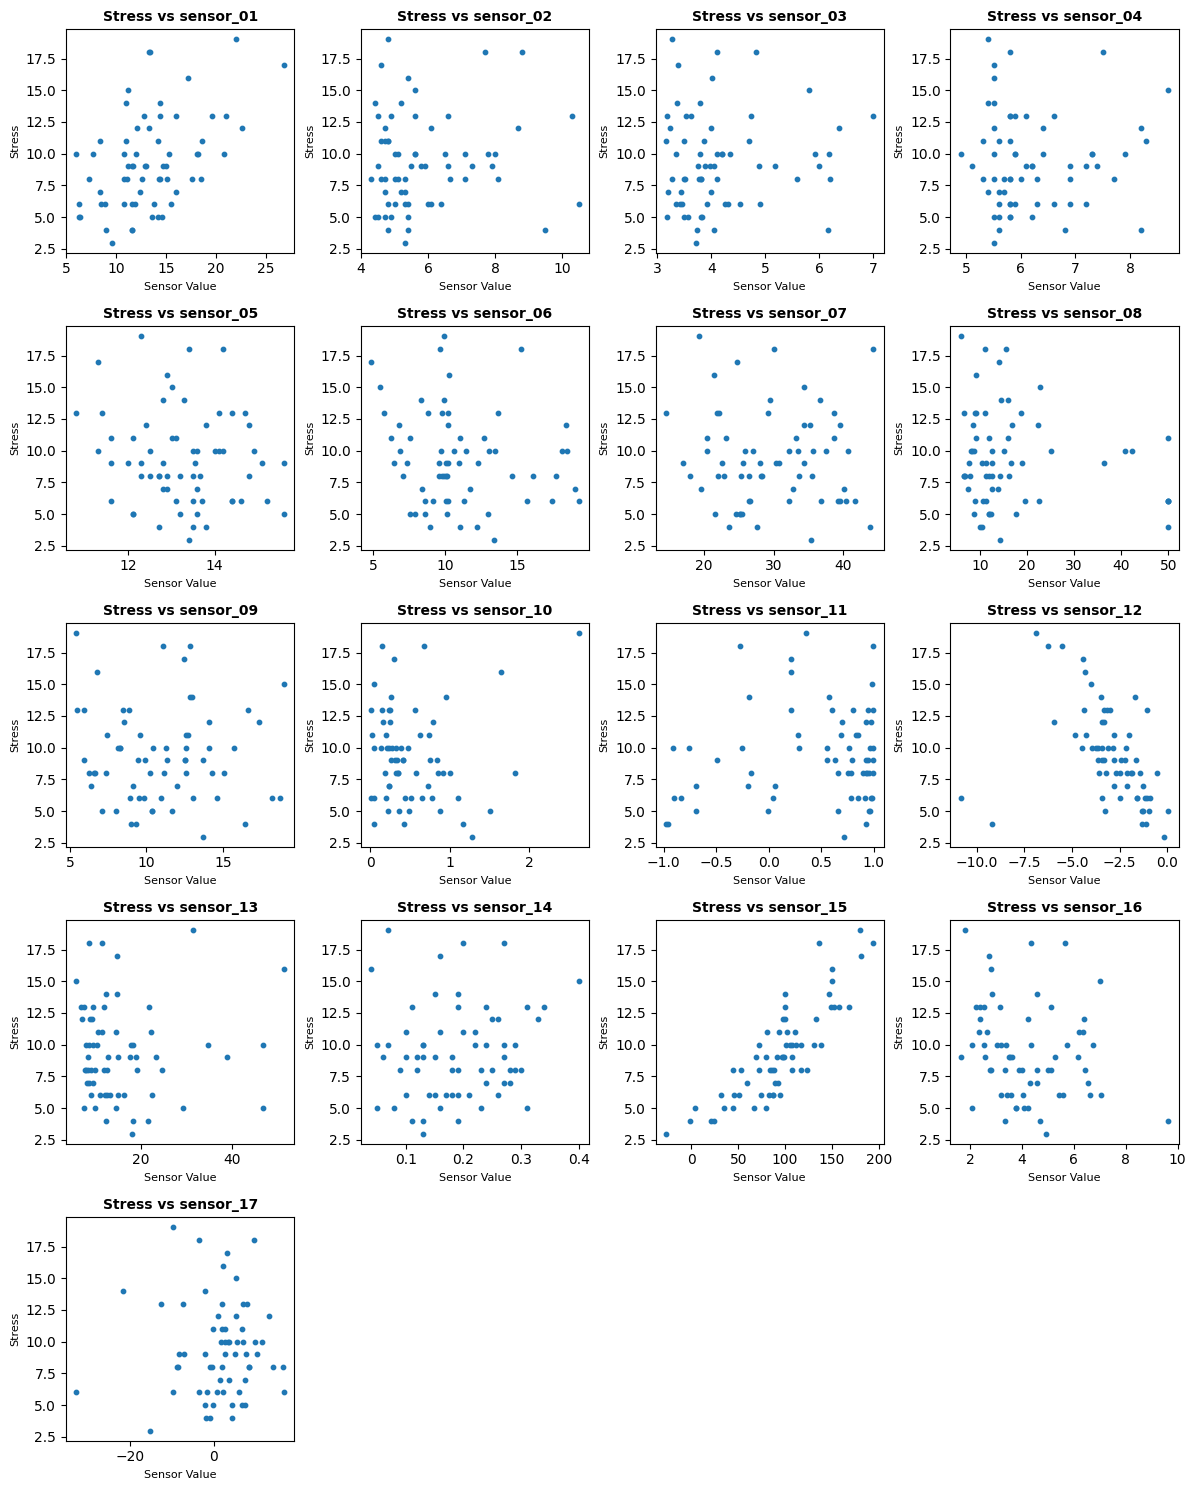

In [72]:

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression


X = pd.read_csv("E2_sensor_vals.csv",sep=';', dtype=float)
Y = pd.read_csv("E2_stress_vals.csv",sep=';', dtype=float)




import math
import matplotlib.pyplot as plt

n_cols = 4                      
n_plots = len(X.columns)
n_rows = math.ceil(n_plots / n_cols)


fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*3, n_rows*3))

axes = axes.ravel() 
for i, col in enumerate(X.columns):
    ax = axes[i]
    ax.scatter(X[col], Y, s=10)  
    ax.set_xlabel("Sensor Value", fontsize = 8)
    ax.set_ylabel("Stress", fontsize = 8)
    ax.set_title(f"Stress vs {col}", fontsize=10, fontweight = 'bold')

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

    


<span style="color: skyblue; font-weight: bold;"> Réponse 2.1</span>

<span style='color:skyblue'>
Les capteurs les plus pertinents semblent être le 1, 12 et le 15. Les autres sont soit trop bruités, soit ne semblent pas être affectés par le stress (pente nulle)


### QUESTION 2.2
On se demande s'il est possible de prédire le niveau de stress à partir d'**une seule** des variables *sensor_01*, *sensor_12* ou *sensor_15*.


#### QUESTION 2.2.1

Effectuez une régression linéaire simple entre chacune de ces trois variables et le niveau de stress. Quelle stratégie de validation croisée vous semble être la plus adaptée sur ce jeu de données ?


#### QUESTION 2.2.2

Peut-on statistiquement affirmer qu'il existe une relation significative entre le niveau de stress et (indépendament) *sensor_01*, *sensor_12* ou bien *sensor_15* ? Si oui, décrivez votre procédure de test.


<span style="color: skyblue; font-weight: bold;"> Réponse 2.2.1</span>

In [36]:
n_samples, n_features = X.shape
print(f"Nombre d'échantillons: {n_samples}")

Nombre d'échantillons: 64


<span style='color:skyblue'>

On envisage 2 méthodes, kfold ou LOOCV :

- On pourrait faire une LOOCV, qui est intéressant pour maximiser l'usage du dataset et il reste envisageable avec $n=64$ du point de vue du temps de calcul. En revanche les données des capteurs sont des données plutôt bruitées par essence donc l'éventuelle présence d'outliers (mise en lumière **Q2.3**) risque d'augmenter la variance de la MSE.

- On choisit donc un kfold car avec $n=64$ on a suffisament de données pour l'envisager. On fixe $n_{splits} = 10$ : un $n_{split}$ élevé permet d'utiliser un maximum d'observations pour l'entrainement à chaque itération (~58 points) et à la fois de s'affranchir des effets le la LOOCV sur la variance de la MSE (car on teste le dataset sur ~6 points). On peut se le permettre car le temps de calucl avec 64 echantillons va rester raisonnable.

In [37]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10)

lr_sensor_01 = LinearRegression()
lr_sensor_12 = LinearRegression()
lr_sensor_15 = LinearRegression()

list_MSE = []
for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    lr_sensor_01.fit(X_train[["sensor_01"]], Y_train)
    lr_sensor_12.fit(X_train[["sensor_12"]], Y_train)
    lr_sensor_15.fit(X_train[["sensor_15"]], Y_train)
    
    Y_pred_01 = lr_sensor_01.predict(X_test[["sensor_01"]])
    Y_pred_12 = lr_sensor_12.predict(X_test[["sensor_12"]])
    Y_pred_15 = lr_sensor_15.predict(X_test[["sensor_15"]])
    
    MSE_01 = np.mean((Y_test - Y_pred_01) ** 2)
    MSE_12 = np.mean((Y_test - Y_pred_12) ** 2)
    MSE_15 = np.mean((Y_test - Y_pred_15) ** 2)
    
    list_MSE.append((MSE_01, MSE_12, MSE_15))

mean_MSE = np.mean(list_MSE, axis=0)
print(f"MSE moyen pour sensor_01: {mean_MSE[0]}")
print(f"MSE moyen pour sensor_12: {mean_MSE[1]}")
print(f"MSE moyen pour sensor_15: {mean_MSE[2]}")

MSE moyen pour sensor_01: 11.130343652653597
MSE moyen pour sensor_12: 14.819190392992212
MSE moyen pour sensor_15: 4.241866827962698


<span style="color: skyblue; font-weight: bold;"> Réponse 2.2.2</span>

<span style="color:skyblue">

On souhaite savoir si une variable X a un effet sur Y. L’hypothèse nulle du test est : $H_{0} : X\ n’a\ aucun\ effet\ sur \ Y$.

Pour le tester, on utilise un test de Fisher pour tester la significativité de la regresion, qui compare la variance expliquée par la régression à la variance des résidus. Si la statistique F calculée est supérieure à la valeur critique, on rejette l’hypothèse nulle et on conclut que X a un effet significatif sur Y.

</span>

In [38]:
from scipy.stats import f

y_mean = np.mean(Y)
n_samples = len(Y)
SCT = np.sum((Y - y_mean)**2)

# Dictionnaire pour mapper les capteurs aux modèles déjà entraînés
models = {
    "sensor_01": lr_sensor_01,
    "sensor_12": lr_sensor_12, 
    "sensor_15": lr_sensor_15
}

list_p = {}
for sensor in ["sensor_01", "sensor_12", "sensor_15"]:
    model = models[sensor]

    SCR = np.sum((Y - model.predict(X[[sensor]]))**2)
    R2 = 1 - SCR/SCT
    F = R2 / (1 - R2) * (n_samples - 2)  # df1=1, df2=n-2
    list_p[sensor] = 1 - f.cdf(F, dfn=1, dfd=n_samples-2)

print("p-values pour les capteurs:")
for sensor, p_value in list_p.items():
    print(f"{sensor}: {p_value}")

p-values pour les capteurs:
sensor_01: [0.00010188]
sensor_12: [0.00269811]
sensor_15: [1.11022302e-16]


/home/audrey-maurette/anaconda3/envs/myenv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/audrey-maurette/anaconda3/envs/myenv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/audrey-maurette/anaconda3/envs/myenv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old

<span style='color:skyblue'>

On fixe $\alpha = 5\%$

Nos p-values sont toutes $<\alpha$ donc on peut rejeter $H_{0}$ pour les 3 capteurs à un niveau de confiance de 95% : Les 3 capteurs sont bien liés linéairement au stress


### QUESTION 2.3

On s'intéresse maintenant au lien entre la variable *sensor_12* et le niveau de stress. On peut remarquer qu'il semble exister une relation linéaire entre ces variables, mais que les données contiennent aussi deux valeurs aberrantes.


#### QUESTION 2.3.1

**Stratégie 1** : Quelle stratégie utiliseriez vous pour détecter automatiquement des données aberrantes dans un jeu de données ?

#### QUESTION 2.3.2

**Stratégie 2** : Nous allons ici utiliser toutes les observations pour l'apprentissage du modèle linéaire et sa validation. En supposant que les erreurs de prédiction suivent une loi normale centrée, pourrait-on aussi détecter les outliers à partir d'un test d'hypothèse. Si oui, décrivez la procédure.


<span style="color: skyblue; font-weight: bold;"> Réponse 2.3.1</span>


<span style='color:skyblue'>

**Stratégie 1 : Distance de Cook**

Pour chaquque observation on calcule la distance de Cook :

$$
D_i = \frac{\sum_{j=1}^{n} \left( \hat{y}_{(j)} - \hat{y}_j \right)^2}{2 s^2}
$$


Cette méthode permet d’identifier automatiquement les observations qui ont une influence excessive sur le modèle, combinant à la fois l’écart aux valeurs prédites et l'effet levier des points.





</span>

Text(0.5, 1.0, 'Stratégie 1 : Distance de Cook')

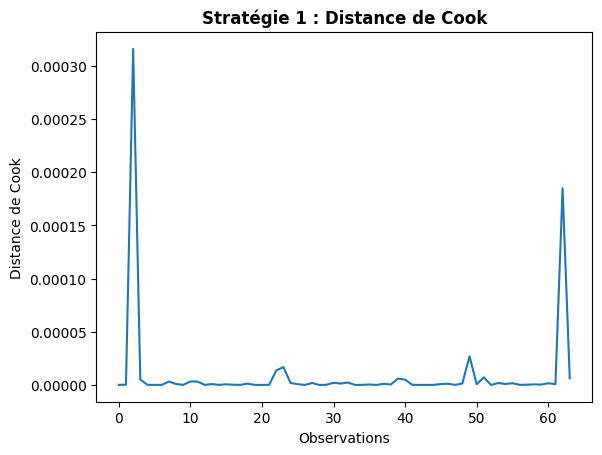

In [39]:
def sse_from_data(X, Y, lr):
    b0, b1 = lr.coef_[0], lr.intercept_
    n = len(Y)
    Y_pred = b0 + b1*X
    SSE = np.sum((Y - Y_pred)**2)
    return SSE / (n-1)

def distance_cook(x, y , i):
    x = np.array(x).reshape(-1, 1)
    y = np.array(y).flatten()
    y_del = np.delete(y, i)
    x_del = np.delete(x, i, axis=0)

    lr_del = LinearRegression()
    lr_del.fit(x_del, y_del)

    lr = LinearRegression()
    lr.fit(x, y)

    di = sum((lr_del.predict(x) - lr.predict(x))**2) / (2 * sse_from_data(x, y, lr))

    return di

x_plot = np.arange(0, len(X), 1)

plt.figure()
plt.plot(x_plot, [distance_cook(X[["sensor_12"]], Y, i) for i in range(len(X))])
plt.xlabel('Observations')
plt.ylabel('Distance de Cook')
plt.title('Stratégie 1 : Distance de Cook', fontweight = 'bold')





<span style="color: skyblue; font-weight: bold;"> Réponse 2.3.2</span>

<span style='color:skyblue'>

**Stratégie 2**


Par hypothèse les résidus suivent une loi normale centrée : $e_{i} = \hat{y_{i}} - y_{i}\sim N(0, \sigma^{2})$

D'après le cours, comme $E(e_{i}) = 0$ on peut définir les résidus studentisés : $t_{i} = \frac{e_{i}}{s(i)\sqrt{1-h_{ii}}}$ avec s(i) une estimation de la variance non biaisée (dans l'expression on retranche l'influence de l'observation i)

Grâce à l'hypothèse de normalité, on peut affirmer que les $t_{i}$ suivent une loi de Student de degrés de liberté $(n-3)$, et ainsi construire un test statistique pour savoir si une observation est atypique :

$H_{0} :\ l'observation \ i \ n'est \ pas \ atypique $ 

$H_{1} :\ l'observation \ i \ a \ un \ résidu \ significativement \ différent \ de \ 0 $

On rejette $H_{0}$ si ces résidus studentisés $t_{i}$ ne sont pas dans l'intervalle $[-2, 2]$

Résidus studentisés : [array([0.16440319]), array([-0.4469086]), array([-3.57471511]), array([1.70177389]), array([0.19355988]), array([-0.13158039]), array([-0.18139947]), array([1.44079522]), array([-0.66394902]), array([-0.20552171]), array([-1.15597515]), array([-1.21477252]), array([0.20257052]), array([-0.57146029]), array([-0.15000913]), array([0.68103711]), array([-0.30023396]), array([-0.15095239]), array([0.9991134]), array([0.07170873]), array([-0.06486636]), array([0.10069143]), array([2.03839199]), array([1.86898084]), array([-0.91038602]), array([-0.51194012]), array([0.05663827]), array([-0.8189291]), array([-0.04674307]), array([0.16576489]), array([1.26110194]), array([1.03377502]), array([-1.35524799]), array([0.02838984]), array([-0.25645684]), array([-0.53747701]), array([0.03890799]), array([-0.8756855]), array([-0.48666803]), array([1.55491179]), array([1.68793646]), array([-0.33223114]), array([-0.02875679]), array([0.0835334]), array([-0.19939769]), array([0.709

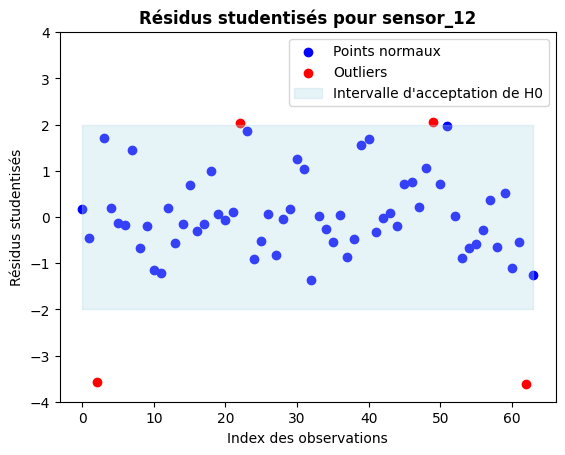

In [41]:
n, p = X.shape

# Ajustement
model = LinearRegression(fit_intercept=True).fit(X[["sensor_12"]], Y)
y_hat = model.predict(X[["sensor_12"]])
residuals = (Y - y_hat).to_numpy()   # <--- conversion numpy

def h_ij(x, i, j):
    n = len(x)
    hij = 1/n + (x[i] - np.mean(x))**2 / np.sum((x - np.mean(x))**2)
    return hij

def s_i2_sans_biais(x, i, residuals):
    n = len(x)
    s2 = 1 /(n - 1) * np.sum(residuals**2)
    return ((n - 1) * s2 - residuals[i]**2 / (1 - h_ij(x, i, i)))/(n-3)

residus_studentises = []
outliers= []
for i in range(len(X)):
    si2 = s_i2_sans_biais(X["sensor_12"].to_numpy(), i, residuals)
    residus_studentises.append(residuals[i] / np.sqrt(si2 * (1 - h_ij(X["sensor_12"].to_numpy(), i, i))))
    if abs(residus_studentises[-1]) > 2:
        outliers.append(i)

print("Résidus studentisés :", residus_studentises)
print("Observations atypiques (indices) :", outliers)

# Séparer les points normaux et les outliers
residus_array = np.array(residus_studentises)
mask_normal = np.abs(residus_array) <= 2
mask_outliers = np.abs(residus_array) > 2


# Plot points normaux en bleu
plt.scatter(x_plot[mask_normal.flatten()], residus_array[mask_normal.flatten()], 
           color='blue', marker='o', label='Points normaux')

# Plot outliers en rouge
plt.scatter(x_plot[mask_outliers.flatten()], residus_array[mask_outliers.flatten()], 
           color='red', marker='o', label='Outliers')

plt.ylim(-4,4)
plt.ylabel("Résidus studentisés")
plt.xlabel("Index des observations")
plt.title("Résidus studentisés pour sensor_12", fontweight='bold')
plt.fill_between(x_plot, -2, 2, color='lightblue', alpha=0.3, label="Intervalle d'acceptation de H0")
plt.legend()

<span style="color:skyblue">

Cette méthode nous permet d'identifier 4 outliers qui sont les mêmes identifiés avec la méthode de la distance de Cook : 2 points peuvent être cl   irement considérés comme outliers, et 2 autres ont une statistique plus proche du reste des données et sont à la limite du critère [-2,2] que l'on a fixé. 

</span>


### QUESTION 2.4


Nous supprimerons dans cette question les deux observations qui sont aberrantes sur la variable *sensor_12*.

Nous souhaitons maintenant sélectionner automatiquement un nombre réduit, mais supérieur à 1, de capteurs qui nous permettraient de prédire au mieux le niveau de stress. Nous allons pour cela utiliser la régression multiple avec un terme de régularisation.

#### QUESTION 2.4.1

Avant d'effectuer une régression linéaire régularisée, il est vivement conseillé d'effectuer une étape de centrage réduction des données. Pourquoi ?


#### QUESTION 2.4.2

Décrivez votre démarche de sélection de variables et vos résultats. Est-ce que l'utilisation des données capteurs vous semble fiable ? 


#### QUESTION 2.4.3

Quelle démarche auriez-vous pour rendre compte des résultats de cette étude sachant que les données contenaient tout de même deux outliers ?



<span style="color:skyblue; font-weight:bold;"> Réponse 2.4.2 </span>



<span style="color:skyblue">

**Démarche :**

<ul>
  


  <li>Prétraitement :
    <ul>
      <li>Suppression des <b>outliers</b></li>
      <li><b>Centrage</b> et <b>réduction</b> des données</li>
      <li><b>K-fold</b> sur l'ensemble d'apprentissage :
        <ul>
          <li>n_splits = 3 : n_splits doit être suffisamment petit pour que la régression soit solvable sachant que l'on a 17 paramètres</li>
          <li>Cela permet d'évaluer la robustesse des variables sélectionnées sans utiliser l'ensemble du test</li>
          <li>On réduit le risque de surapprentissage</li>
        </ul>
      </li>
    </ul>
  </li>
  <li><b>Sélection de type forward</b> avec <b>critère BIC</b> :
    <ul>
      <li>Le critère <b>BIC</b> permet de prendre en compte une pénalité sur le nombre de paramètres. Ainsi, dans le cadre d'une sélection de type forward, ce critère permet d'éviter d'ajouter trop de capteurs et de sur-ajuster les données</li>
    </ul>
  </li>
</ul>

</span>



In [69]:

#Suppression des outliers
outliers = np.where(MSE_array > 100)[0]

X_clean = X.drop(index=outliers)
Y_clean = Y.drop(index=outliers)


#Centrage et réduction
X_scaled = (X_clean - X_clean.mean()) / X_clean.std()
Y_scaled = (Y_clean - Y_clean.mean()) / Y_clean.std()




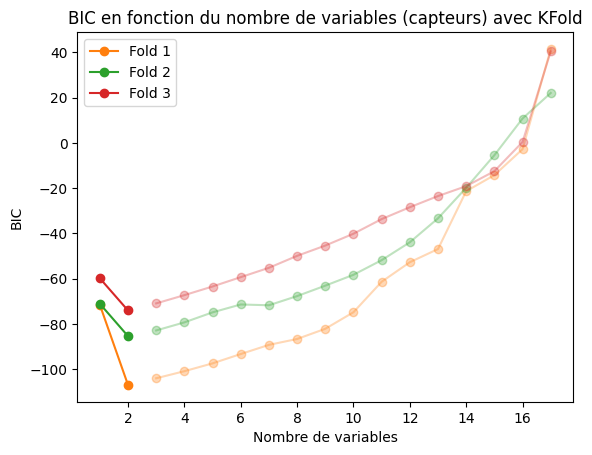

Fold 1 → Variables : ['sensor_12', 'sensor_15'] | MSE : 0.1458
Fold 2 → Variables : ['sensor_12', 'sensor_15'] | MSE : 0.2065
Fold 3 → Variables : ['sensor_12', 'sensor_15'] | MSE : 0.2479


In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

def BIC(y_true, y_pred, n, q):
    return n * np.log(mean_squared_error(y_true, y_pred)) + np.log(n) * (q + 1)

# Paramètres
p, n = X_scaled.shape[1], X_scaled.shape[0]
kf = KFold(n_splits=3, shuffle=True, random_state=42)

BIC_all_folds = []
selected_vars_folds = []
mse_folds = []

colors = plt.cm.tab10.colors  

for fold, (train_idx, test_idx) in enumerate(kf.split(X_clean), start=1):
    X_train, X_test = X_scaled.iloc[train_idx], X_scaled.iloc[test_idx]
    y_train, y_test = Y_scaled.iloc[train_idx], Y_scaled.iloc[test_idx]

    selected = np.zeros(p, dtype=bool)
    history = []
    BIC_ = []
    lr = LinearRegression()
    sweet_spot = -1

    for q in range(1, p + 1):
        list_BIC = np.full(p, np.inf)


        for i in range(p):
            if not selected[i] or q == 1:
                cols = selected.copy()
                cols[i] = True
                Xtr, Xte = X_train.iloc[:, cols], X_test.iloc[:, cols]

                lr.fit(Xtr, y_train)
                y_pred = lr.predict(Xte)
                list_BIC[i] = BIC(y_test, y_pred, n, q)

        best_var = np.argmin(list_BIC)
        selected[best_var] = True

        lr.fit(X_train.iloc[:, selected], y_train)
        y_pred = lr.predict(X_test.iloc[:, selected])
        bic = BIC(y_test, y_pred, n, q)
        BIC_.append(bic)
        history.append(selected.copy())

        if q > 1 and bic >= BIC_[-2] and sweet_spot == -1:
            sweet_spot = q - 1

    if sweet_spot == -1:
        sweet_spot = len(BIC_)


    best_selected = history[sweet_spot - 1]
    final_vars = list(X_clean.columns[best_selected])

    
    lr.fit(X_train.iloc[:, best_selected], y_train)
    y_pred_final = lr.predict(X_test.iloc[:, best_selected])
    mse_final = mean_squared_error(y_test, y_pred_final)

    BIC_all_folds.append(BIC_)
    selected_vars_folds.append(final_vars)
    mse_folds.append(mse_final)

    
    x_vals = np.arange(1, len(BIC_) + 1)
    color = colors[fold % 10]

    
    plt.plot(x_vals[:sweet_spot], BIC_[:sweet_spot], marker="o", color=color, label=f"Fold {fold}")

    
    plt.plot(x_vals[sweet_spot:], BIC_[sweet_spot:], marker='o',color=color, alpha=0.3)

    


plt.xlabel("Nombre de variables")
plt.ylabel("BIC")
plt.title("BIC en fonction du nombre de variables (capteurs) avec KFold")
plt.legend()
plt.show()


for f, (vars_, mse_) in enumerate(zip(selected_vars_folds, mse_folds), start=1):
    print(f"Fold {f} → Variables : {vars_} | MSE : {mse_:.4f}")




<span style='color:skyblue'>

**Résultats :**

La sélection de type forward sélectionne systématiquement les capteurs 12 et 15 pour l'ensemble des splits. 
La méthode de sélection semble fiable : 
- les mêmes variables sont systématiquement sélectionnées, et le risque de surajustement est faible
- le BIC est négatif et relativement faible : le modèle obtenu semble précis.


</span>

<span style='color:skyblue'>

**Réponse Q2.4.3 :**


Pour rendre compte de cette étude, il est essentiel de documenter la recherche et l’identification des outliers, notamment en explicitant le test statistique utilisé pour les mettre en évidence. Leur retrait doit être clairement justifié.

Ensuite, il faut nuancer les résultats de la régression multiple : la quasi-totalité des folds de validation retiennent le capteur sensor_12, alors même que celui-ci a produit des valeurs aberrantes. Cela interroge directement la fiabilité physique de la mesure : avant de mettre en place un outil prédictif basé sur ces capteurs, il serait indispensable de comprendre la cause de ces anomalies (erreur de capteur, problème de calibration, artefact de mesure, etc.).


</span>